In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

#calendar.csv contains 4 columns: listing_id, date, availabel and price.
#price=NaN if available='f'
def clean_calendar(fl):
    #read a file in csv format, fl is filename
    #drop NaN rows and 'available' column
    #change price from $1,200 to 1200(float)
    #change the type of date and get the day of week
    #return a cleaned dataframe with listing_id, date, price and week
    df = pd.read_csv(fl).dropna().drop(columns='available').reset_index(drop=True)
    df['price'] =  df['price'].apply(lambda x: x.replace('$','').replace(',','')).astype('float')   
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.dayofweek
    return df

def ave_price_day(df,fl):
    #calculate and plot the average and median price of all houses as a function of date
    #save the average dialy price to "dialyprice.csv" in the orinial folder
    date = np.sort(df['date'].unique())
    ave_price = [df[df['date']==d]['price'].mean() for d in date]
    #out = "/".join(fl.split('/')[0:-1])+'/dialyprice.csv'
    #pd.DataFrame(ave_price,index=date,columns=['ave_price']).to_csv(out)
    median_price = [df[df['date']==d]['price'].median() for d in date]
    #plot
    plt.figure(figsize=(20,5))
    plt.plot(date,ave_price,label='average price')
    plt.plot(date,median_price,label='median price')
    #plot format
    ax=plt.gca()
    plt.xlabel('Date (Every Friday, Month/Year)',fontsize=15)
    plt.ylabel('Price in $',fontsize=15)
    plt.title('Average and Median Price of AirBnB Listings Collected on '+fl.split('/')[1],fontsize=15)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y')) 
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(FR)))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d')) 
    ax.tick_params(pad=15,labelsize='large')
    leg = plt.legend(fontsize=15)
    leg.get_frame().set_linewidth(0.0)
    plt.show()

def one_house(df,n):
    #calculate the average price of a house on different days of week; 
    #n is the listing_id of the house
    y = df[df['listing_id']==n]
    return [y[y['week']==i]['price'].mean() for i in range(7)]
    
def ave_price_weekly(df,fl):
    #calculate the average price for every house on every day of the week
    #save it to 'weeklyprice.csv' in the original folder
    #plot the relative price 
    listings = df['listing_id'].unique()
    week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    houses = [ one_house(df,l) for l in listings]
    houses = pd.DataFrame(houses,index=listings,columns=week).dropna()
    #out = "/".join(fl.split('/')[0:-1])+'/weeklyprice.csv'
    #houses.to_csv(out)
    #calculate the relative price and plot
    rel_price=houses.apply(lambda x: x/x[0],axis=1).apply(lambda x: x.sum(),axis=0).to_frame().apply(lambda x: x/x[0],axis=0)
    rel_price.plot(kind='bar',legend=False)
    plt.xticks(rotation=0)
    plt.xlabel('Day of the Week')
    plt.ylabel('Relative Average Price')
    plt.title('Average Price per Day of the Week Collected on '+fl.split('/')[1])
    plt.show()
    return houses
    
def explore_calendar(fl):
    clean_df = clean_calendar(fl)
    ave_price_day(clean_df,fl)
    week = ave_price_weekly(clean_df,fl)
    return week

In [101]:
files = ['2018_04_14','2018_05_17','2018_07_17','2018_08_16','2018_09_14','2018_10_11','2018_11_15','2018_12_13','2019_01_17','2019_02_09']
mergedf = pd.concat([clean_calendar('data/'+f+'/calendar.csv') for f in files],sort=False,join='inner')
#ave_price_day(mergedf,'data/weekly.csv')

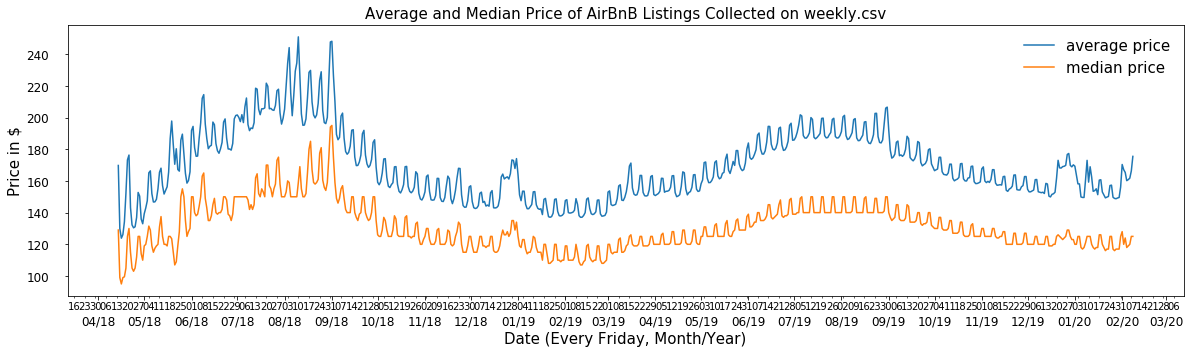

In [105]:
ave_price_day(mergedf,'data/weekly.csv')

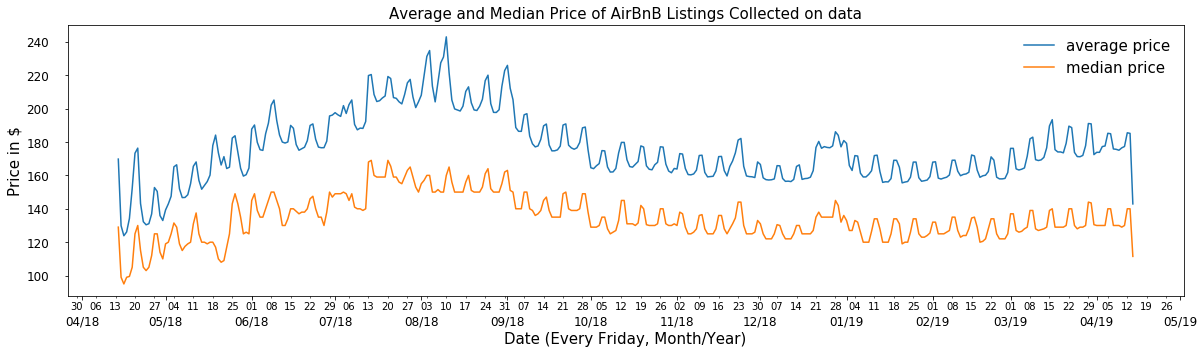

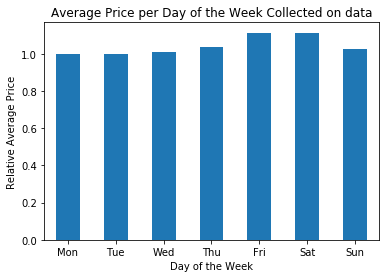

In [8]:
week = explore_calendar('../data/2018_04_14/calendar.csv').apply(lambda x: x/x[0],axis=1).apply(lambda x: x.sum(),axis=0).to_frame().apply(lambda x: x/x[0],axis=0)

In [17]:
week.values

array([[1.        ],
       [1.00037356],
       [1.01236993],
       [1.03550856],
       [1.11344638],
       [1.1099834 ],
       [1.02425002]])

In [18]:
week.plot(y=week.values,kind='bar',legend=False,use_index=True)
#for a,b in zip(df['num'],df['resultRate']):
#    plt.text(a, b+0.001, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)

KeyError: '[(1.0,) (1.0003735592641025,) (1.0123699256231615,) (1.035508562134746,)\n (1.1134463807507549,) (1.1099833958446808,) (1.0242500184898549,)] not in index'

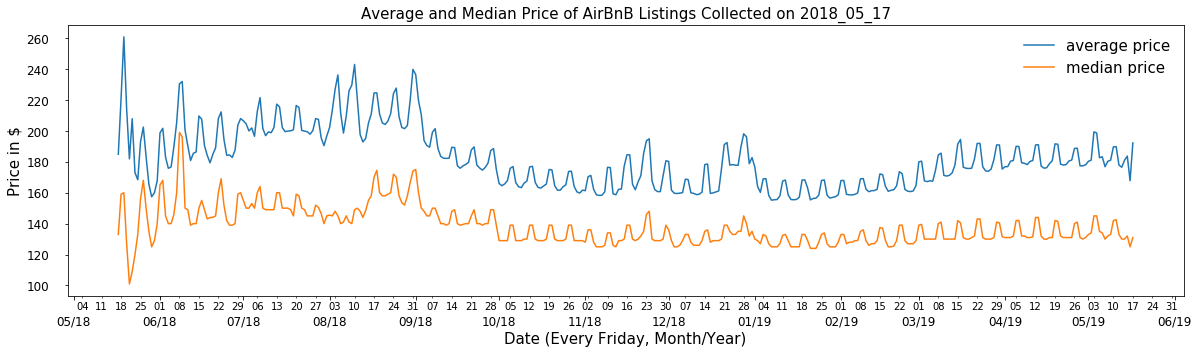

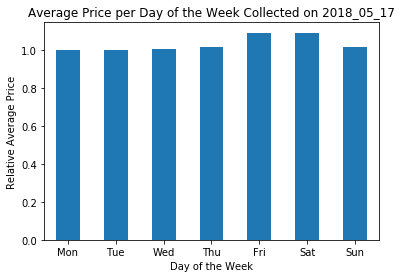

In [19]:
explore_calendar('data/2018_05_17/calendar.csv')

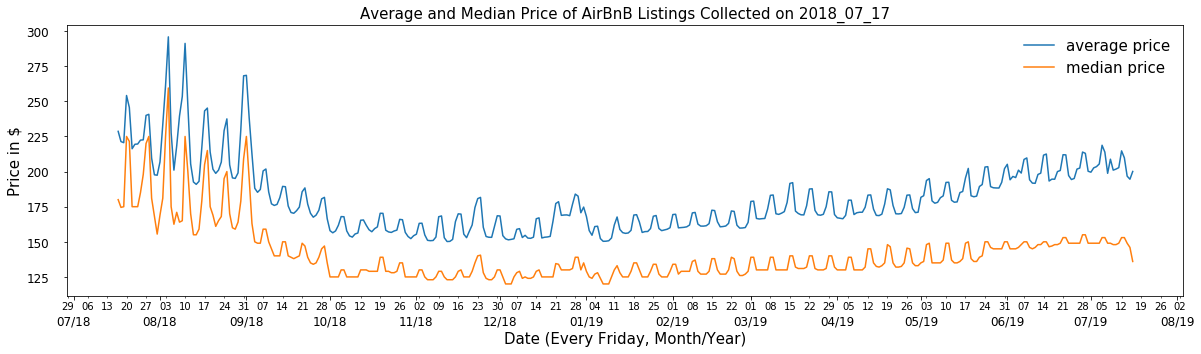

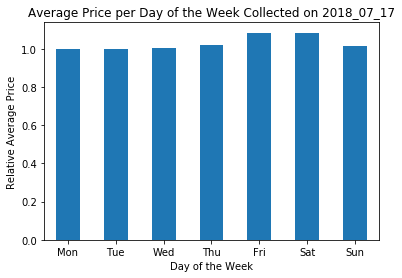

In [22]:
explore_calendar('data/2018_07_17/calendar.csv')

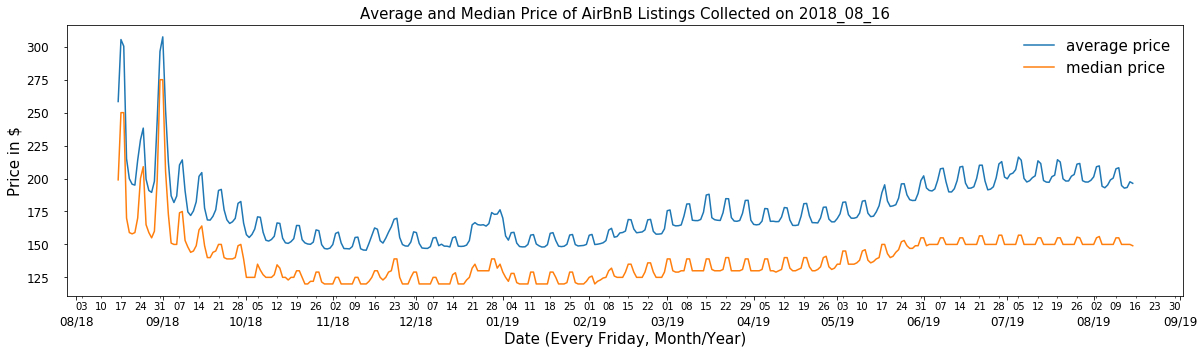

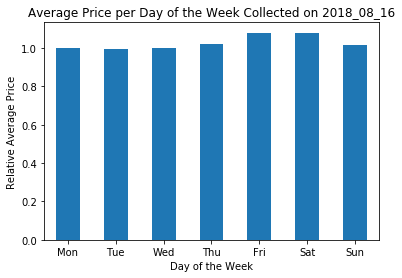

In [23]:
explore_calendar('data/2018_08_16/calendar.csv')

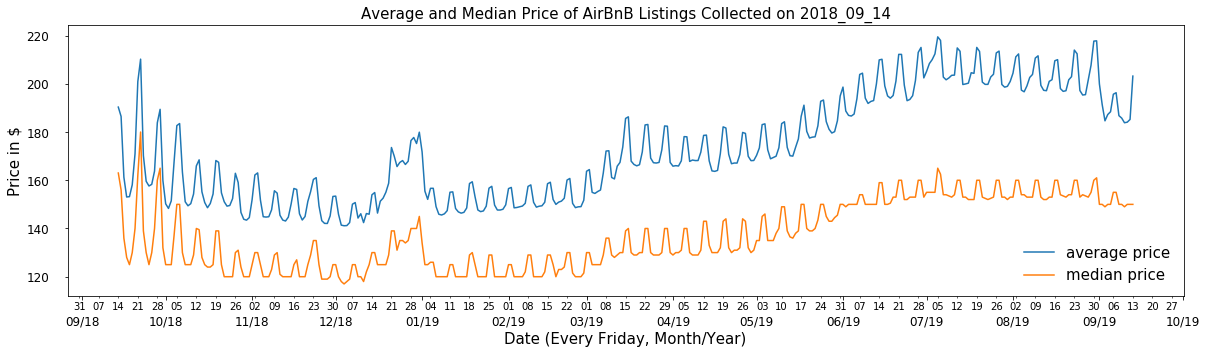

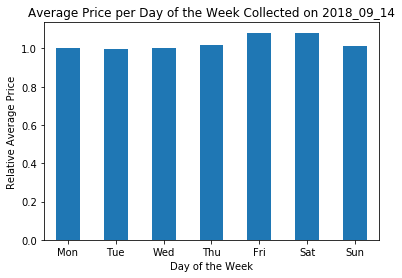

In [24]:
explore_calendar('data/2018_09_14/calendar.csv')

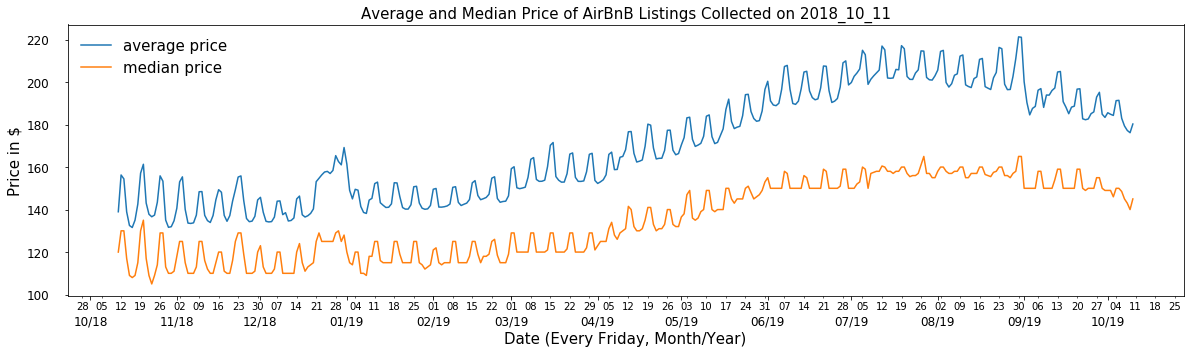

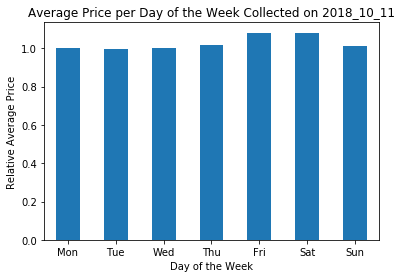

In [25]:
explore_calendar('data/2018_10_11/calendar.csv')

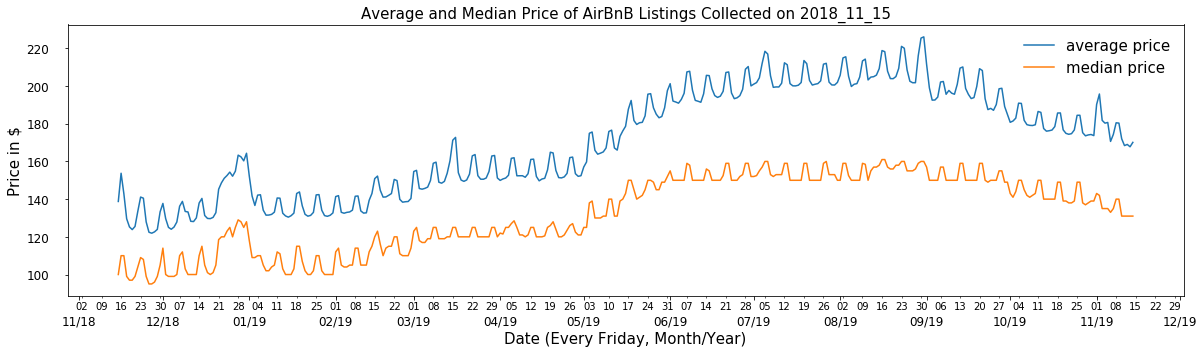

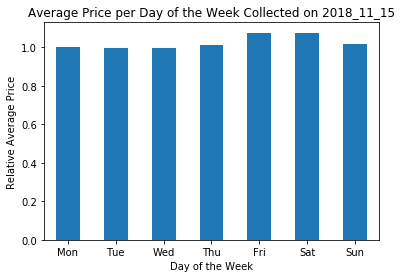

In [26]:
explore_calendar('data/2018_11_15/calendar.csv')

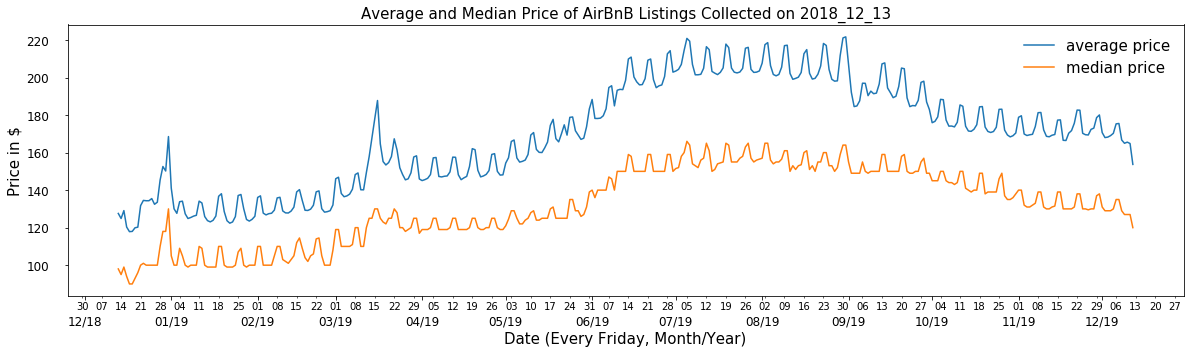

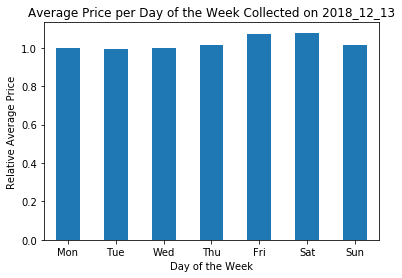

In [27]:
explore_calendar('data/2018_12_13/calendar.csv')

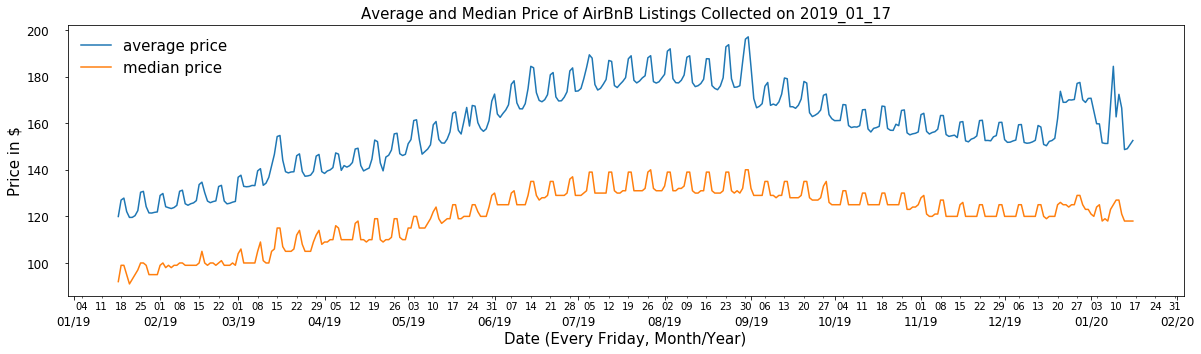

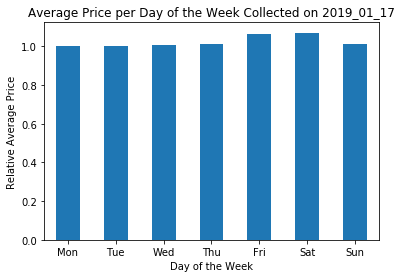

In [28]:
explore_calender('data/2019_01_17/calendar.csv')

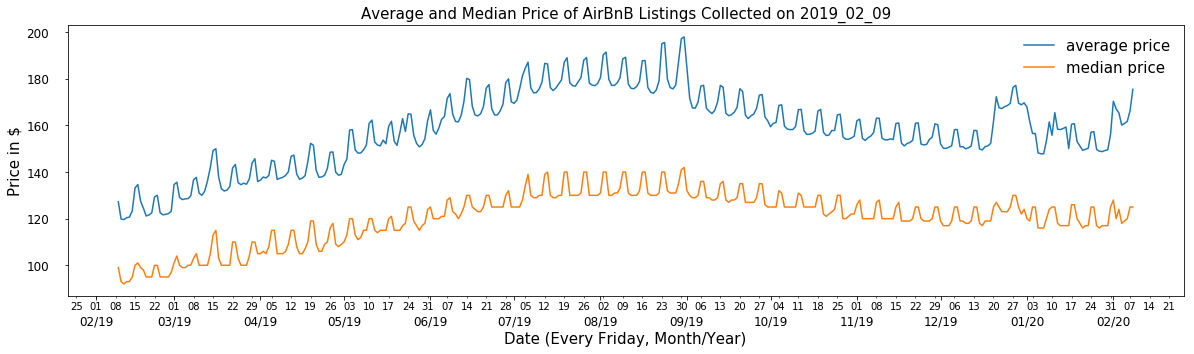

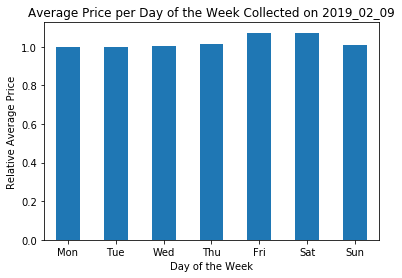

In [29]:
explore_calender('data/2019_02_09/calendar.csv')